## Bank Note Authentication¶

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.



https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

In [1]:
import pandas as pd
import numpy as np

In [2]:

df=pd.read_csv('BankNote_Authentication.csv')
df.head(1)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# sns.pairplot(df, hue="class");

In [36]:

df0 = df[ df['class'] == 0 ]
df1 = df[ df['class'] == 1 ]

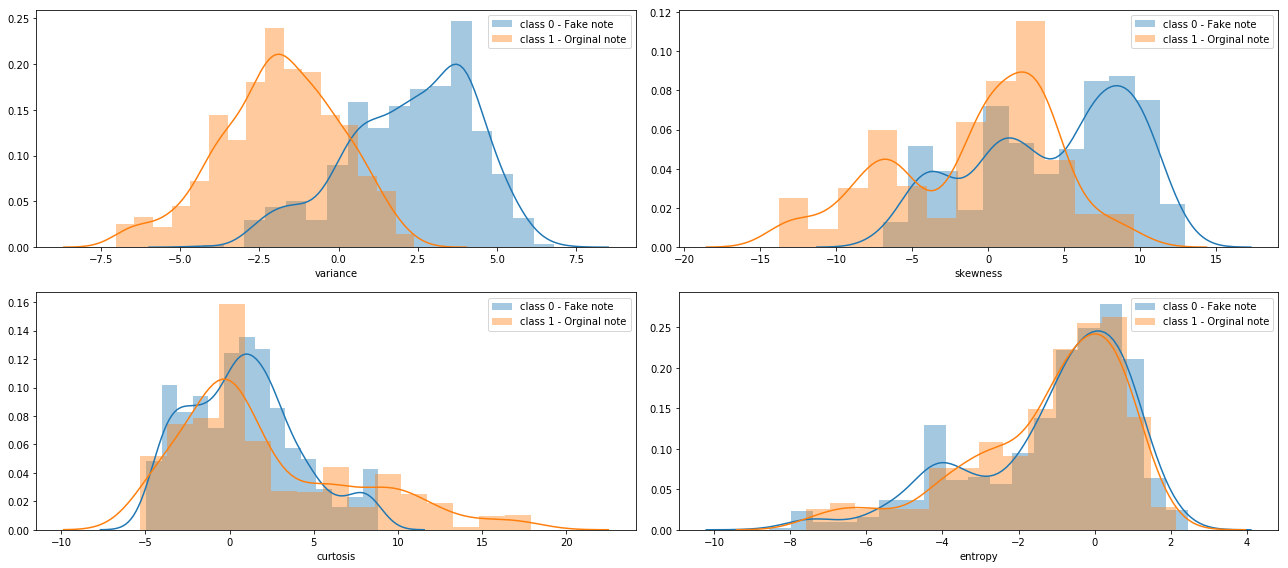

In [43]:
plt.figure(figsize = ( 18 , 8 ) )

j = 1 
for c in ['variance','skewness','curtosis','entropy']:
    plt.subplot( 2 , 2 , j)
    sns.distplot( df0[c] , label = 'class 0 - Fake note')
    sns.distplot( df1[c] , label = 'class 1 - Orginal note')
    plt.legend()
    j = j + 1

plt.tight_layout()
plt.show()

In [3]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [4]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0 , stratify = y )

In [18]:
from sklearn.linear_model import LogisticRegression
lf = LogisticRegression()
lf.fit(X_train,y_train)
print('Training Accuracy.......')
y_pred_lf=lf.predict(X_train)
score=accuracy_score(y_train,y_pred_lf)
print('Accuracy Score :' , score )
print()
print('Testing Accuracy.......')
y_pred_lf=lf.predict(X_test)
score=accuracy_score(y_test,y_pred_lf)
print('Accuracy Score :' , score )

Training Accuracy.......
Accuracy Score : 0.9875

Testing Accuracy.......
Accuracy Score : 0.9951456310679612


In [19]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(lf, pickle_out)
pickle_out.close()

In [20]:
lr.predict([[2,3,4,1]])

array([0], dtype=int64)